In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import functions as f

### JH_LP_40_50_10

In [113]:
folder_name = 'variance_LP_jh'
variance_all_csv_data = f.load_csv_files_in_folder(folder_name)

# Printing the loaded CSV data for each file
keyword = "Truck-100"

YT_A_LP_data_jh, column_names = f.create_YT_A_Data(keyword, variance_all_csv_data)
YT_A_LP_data_jh_df = pd.DataFrame(YT_A_LP_data_jh, columns = column_names)
YT_A_LP_data_jh_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.972,66.388,35.572,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),432.584,95.928,35.636,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),426.584,90.260,35.312,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),493.384,156.884,35.492,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),445.480,109.092,35.388,50
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),534.252,198.256,34.996,60
7,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),540.036,198.184,38.304,70


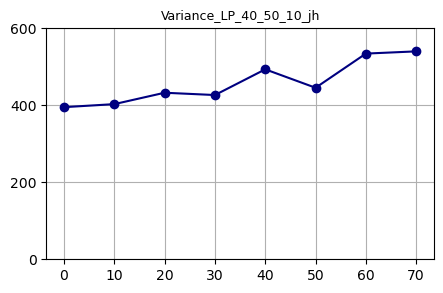

In [116]:
x_value = YT_A_LP_data_jh_df['prev YT Num']
y_value = YT_A_LP_data_jh_df['Total Time']

title_name = "Variance_LP_40_50_10_jh"
x_label = "prev YT Num"
y_label = "Total Time"

f.plot(x_value, y_value, title_name)

### variance_shortest_hg

In [95]:
# Printing the loaded CSV data for each file
folder_name = 'variance_shortest_hg'
variance_all_csv_data = f.load_csv_files_in_folder(folder_name)

keyword = "Truck-100"

YT_A_shortest_data_hg, column_names = f.create_YT_A_Data(keyword, variance_all_csv_data)
YT_A_shortest_data_hg_df = pd.DataFrame(YT_A_shortest_data_hg, columns = column_names)
YT_A_shortest_data_hg_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.412,66.072,35.212,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),405.536,69.556,34.840,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),431.280,94.004,35.416,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),458.484,121.136,36.016,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),511.028,176.076,33.768,50
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),507.980,170.748,35.520,60
7,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),589.560,247.300,40.596,70


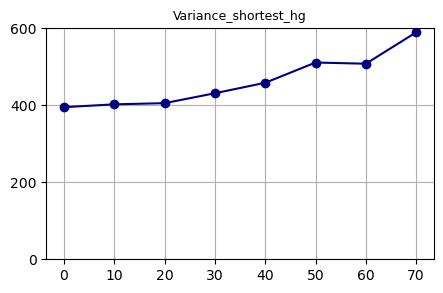

In [96]:
x_value = YT_A_shortest_data_hg_df['prev YT Num']
y_value = YT_A_shortest_data_hg_df['Total Time']

f.plot(x_value, y_value, "Variance_shortest_hg")

### LP_40_50_10_tm

In [97]:
folder_name = 'variance_LP_tm/LP_40_50_10'
variance_all_csv_data = f.load_csv_files_in_folder(folder_name)

keyword = "Truck-100"

YT_A_LP_data_tm, column_names = f.create_YT_A_Data(keyword, variance_all_csv_data)
YT_A_LP_data_tm_df = pd.DataFrame(YT_A_LP_data_tm, columns = column_names)
YT_A_LP_data_tm_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),401.460,65.128,35.312,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),436.200,99.680,35.508,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),433.040,96.600,35.432,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),464.360,127.780,35.572,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),469.236,132.608,35.624,40
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),504.056,165.104,37.128,50
7,Truck-100,Route-100,(175.0 0.0 55.5),(125.0 0.0 200.0),418.676,82.648,34.904,60
8,Truck-100,Route-100,(425.0 0.0 155.5),(375.0 0.0 200.0),445.208,112.172,31.940,70


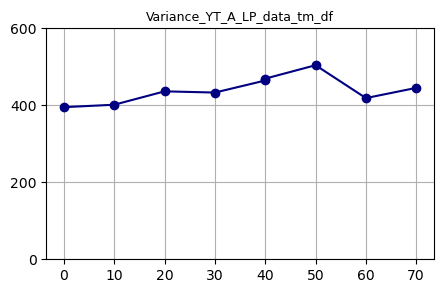

In [98]:
x_value = YT_A_LP_data_tm_df['prev YT Num']
y_value = YT_A_LP_data_tm_df['Total Time']

f.plot(x_value, y_value, "Variance_YT_A_LP_data_tm_df")

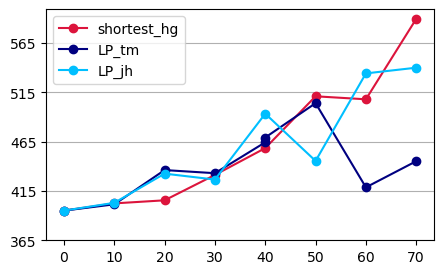

In [99]:
x_value_1 = YT_A_shortest_data_hg_df['prev YT Num']
y_value_1 = YT_A_shortest_data_hg_df['Total Time']

x_value_2 = YT_A_LP_data_tm_df['prev YT Num']
y_value_2 = YT_A_LP_data_tm_df['Total Time']

x_value_3 = YT_A_LP_data_jh_df['prev YT Num']
y_value_3 = YT_A_LP_data_jh_df['Total Time']

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5,3))
plt.plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'crimson')
plt.plot(x_value_2, y_value_2 , marker='o', linestyle='-', color = 'navy')
plt.plot(x_value_3, y_value_3 , marker='o', linestyle='-', color = 'deepskyblue')

# max y_value
_y_values = pd.concat([y_value_1, y_value_2, y_value_3])


plt.yticks(range(int(_y_values.min()) - 30, int(_y_values.max()) + 10, 50))
plt.legend(['shortest_hg', 'LP_tm', 'LP_jh'], loc='upper left')
# plt.legend(['shortest_hg', 'LP_jh'], loc='upper left')

# plt.xticks(range(0, x_values.max() + 10, 10))

plt.grid(True, axis ='y')
plt.show()



### LP_30_60_10_tm

In [100]:
folder_name = 'variance_LP_tm/LP_30_60_10'
variance_all_csv_data = f.load_csv_files_in_folder(folder_name)

keyword = "Truck-100"

YT_A_LP_30_60_10_data_tm, column_names = f.create_YT_A_Data(keyword, variance_all_csv_data)
YT_A_LP_30_60_10_data_tm_df = pd.DataFrame(YT_A_LP_30_60_10_data_tm, columns = column_names)
YT_A_LP_30_60_10_data_tm_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),401.040,61.012,35.052,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),407.156,67.220,34.952,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),412.836,72.764,35.088,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),435.856,95.888,34.980,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),436.492,96.544,34.964,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),448.204,108.364,34.792,50
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),554.432,216.964,32.324,60
7,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),524.372,184.360,35.000,70


In [101]:
x_value = YT_A_LP_30_60_10_data_tm_df['prev YT Num']
y_value = YT_A_LP_30_60_10_data_tm_df['Total Time']

title_name = "Variance_YT_A_LP_30_60_10_data_tm_df"
x_label = "prev YT Num"
y_label = "Total Time"

f.plot(x_value, y_value, title_name, x_label, y_label)

TypeError: plot() takes 3 positional arguments but 5 were given

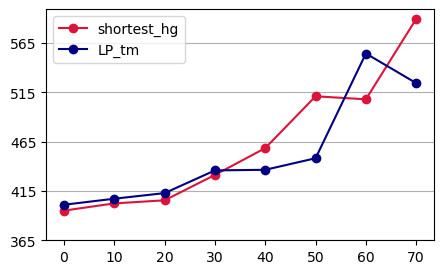

In [ ]:
x_value_1 = YT_A_shortest_data_hg_df['prev YT Num']
y_value_1 = YT_A_shortest_data_hg_df['Total Time']

x_value_2 = YT_A_LP_30_60_10_data_tm_df['prev YT Num']
y_value_2 = YT_A_LP_30_60_10_data_tm_df['Total Time']

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5,3))
plt.plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'crimson')
plt.plot(x_value_2, y_value_2 , marker='o', linestyle='-', color = 'navy')

# max y_value
_y_values = pd.concat([y_value_1, y_value_2])

plt.yticks(range(int(_y_values.min()) - 30, int(_y_values.max()) + 10, 50))
plt.legend(['shortest_hg', 'LP_tm'], loc='upper left')

plt.grid(True, axis ='y')
plt.show()

